# Level 1:

## Task: Data Exploration and Preprocessing

### 1. Explore the dataset and identify the number of rows and columns

In [9]:
import pandas as pd

In [11]:
dataset=pd.read_csv("Dataset.csv")

In [15]:
dataset.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [23]:
# no of rows
dataset.shape[0]

9551

In [25]:
# no of columns
dataset.shape[1]

21

### 2. Check for missing values in each column andhandle them accordingly.

In [28]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [30]:
dataset["Cuisines"].mode()[0]

'North Indian'

In [32]:
dataset["Cuisines"].fillna(dataset["Cuisines"].mode()[0],inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_19928\1029350168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Cuisines"].fillna(dataset["Cuisines"].mode()[0],inplace=True)


In [34]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

C:\Users\PMLS\AppData\Local\Temp\ipykernel_19928\51860605.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Aggregate rating'])


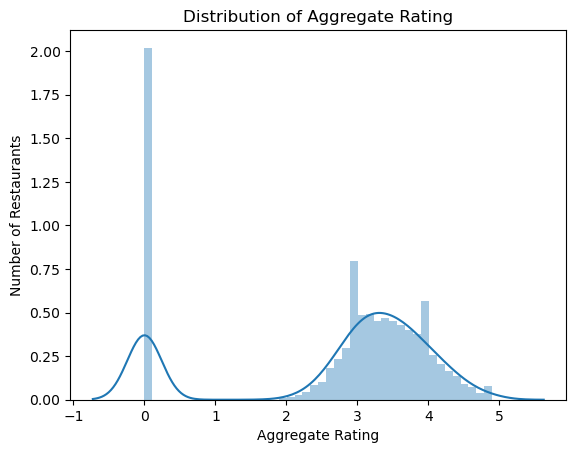

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(dataset['Aggregate rating'])
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Rating')
plt.show()

## Task: Descriptive Analysis

In [ ]:
### Calculate basic statistical measures (mean,median, standard deviation, etc.) for numericalcolumns.

In [45]:

numerical_columns = ['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

# Calculate descriptive statistics
descriptive_stats = dataset[numerical_columns].describe().round(2)

# Print the results
print(descriptive_stats)

       Country Code  Longitude  Latitude  Average Cost for two  Price range  \
count       9551.00    9551.00   9551.00               9551.00      9551.00   
mean          18.37      64.13     25.85               1199.21         1.80   
std           56.75      41.47     11.01              16121.18         0.91   
min            1.00    -157.95    -41.33                  0.00         1.00   
25%            1.00      77.08     28.48                250.00         1.00   
50%            1.00      77.19     28.57                400.00         2.00   
75%            1.00      77.28     28.64                700.00         2.00   
max          216.00     174.83     55.98             800000.00         4.00   

       Aggregate rating     Votes  
count           9551.00   9551.00  
mean               2.67    156.91  
std                1.52    430.17  
min                0.00      0.00  
25%                2.50      5.00  
50%                3.20     31.00  
75%                3.70    131.00  


In [47]:
### Explore the distribution of categoricalvariables like "Country Code," "City," and"Cuisines.

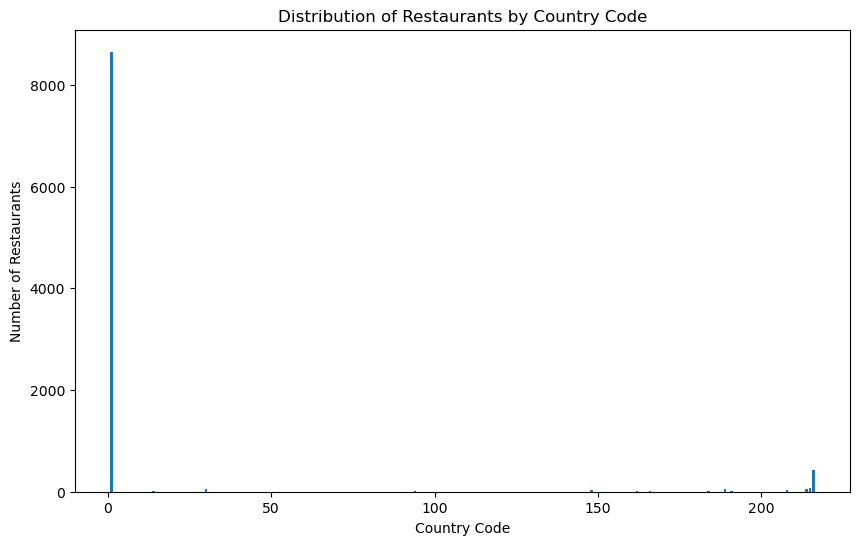

In [53]:
country_counts = dataset['Country Code'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(country_counts.index, country_counts)
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country Code')
plt.show()